In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus
import matplotlib.image as pltimg
import graphviz 

############################
from sklearn import preprocessing, metrics
from sklearn.ensemble import RandomForestRegressor,VotingClassifier,RandomForestClassifier
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV, cross_validate, cross_val_predict, KFold, train_test_split,cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.externals import joblib
from sklearn.linear_model import LinearRegression
from sklearn.inspection import permutation_importance
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import max_error, mean_absolute_error, mean_squared_error,r2_score
from sklearn.tree._export import plot_tree


C:\Users\aleon\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [3]:
import platform; print(platform.platform())
import sys; print("Python", sys.version)
import numpy; print("NumPy", numpy.__version__)
import scipy; print("SciPy", scipy.__version__)
import sklearn; print("Scikit-Learn", sklearn.__version__)

Windows-10-10.0.18362-SP0
Python 3.7.1 (default, Dec 10 2018, 22:54:23) [MSC v.1915 64 bit (AMD64)]
NumPy 1.18.1
SciPy 1.4.1
Scikit-Learn 0.22.1


In [24]:
df_metricasAL = pd.read_csv('microdadosMetricasAlagoas.csv', sep = ';', encoding='ISO 8859-1')
df_metricasAL = df_metricasAL.loc[:, ~df_metricasAL.columns.str.contains('^Unnamed')]
df_metricasAL

,Modelo,Max_Error,MAE,R²,MSE,CV scores mean,CV scores std,Tempo de processamento min
0,Random Forest,485.11,58.77,0.40,5428.39,0.40,0.01,7.88
1,Regressão Linear,513.67,57.01,0.44,5072.02,0.43,0.01,0.25
2,Rede Neural,499.38,55.96,0.45,4965.24,0.45,0.02,20.82
3,Árvore de decisão,647.80,78.71,-0.12,10057.61,-0.11,0.01,2.31


In [25]:
df_metricasBR = pd.read_csv('microdadosMetricasNacional.csv', sep = ';', encoding='ISO 8859-1')
df_metricasBR = df_metricasBR.loc[:, ~df_metricasBR.columns.str.contains('^Unnamed')]
df_metricasBR

,Modelo,Max_Error,MAE,R²,MSE,CV scores mean,CV scores std,Tempo de processamento min
0,Random Forest,485.11,58.77,0.40,5428.39,0.40,0.01,8.65
1,Regressão Linear,513.67,57.01,0.44,5072.02,0.43,0.01,0.33
2,Rede Neural,499.38,55.96,0.45,4965.24,0.45,0.02,22.57
3,Árvore de decisão,647.80,78.71,-0.12,10057.61,-0.11,0.01,2.39


In [16]:
df_metricasAL.columns

Index(['Modelo', 'Max_Error', 'MAE', 'R²', 'MSE', 'CV scores mean',
       'CV scores std', 'Tempo de processamento min'],
      dtype='object')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020FD4615E48>,
      dtype=object)

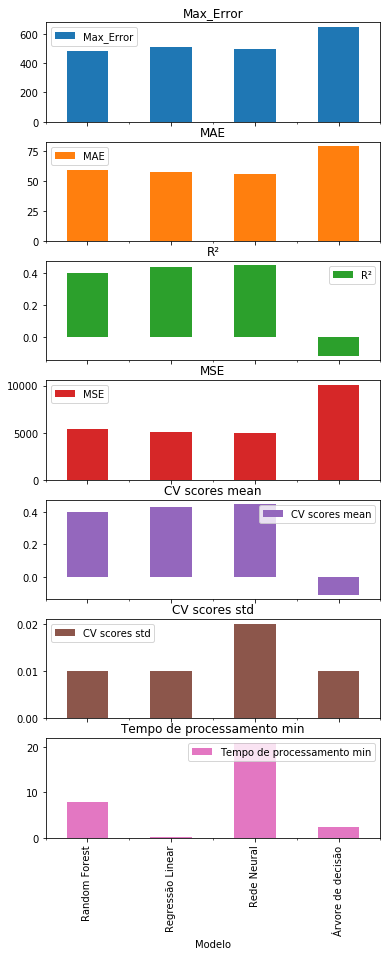

In [48]:
df_metricasAL.plot.bar(x = 'Modelo', subplots = True, figsize=(6, 15))

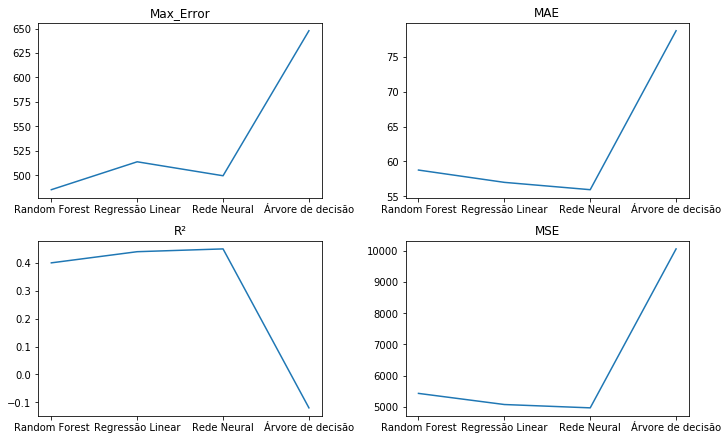

In [72]:

labels = df_metricasAL['Modelo']
colunas = ['Max_Error', 'MAE', 'R²', 'MSE']

#x = np.arange(0, size)

fig, axes = plt.subplots(2, 2, figsize=[10,6], constrained_layout=True)
ax0, ax1, ax2, ax3 = axes.flatten()

ax0.plot(df_metricas['Modelo'], df_metricas['Max_Error'] )
ax0.set_title(colunas[0])

ax1.plot(df_metricas['Modelo'], df_metricas[ 'MAE'] )
ax1.set_title(colunas[1])

ax2.plot(df_metricas['Modelo'], df_metricas['R²'] )
ax2.set_title(colunas[2])

ax3.plot(df_metricas['Modelo'], df_metricas['MSE'] )
ax3.set_title(colunas[3])

#plt.legend()
plt.show()

In [28]:
df_resposta = pd.read_csv('microdadosRespostaAlagoas.csv', sep = ';', encoding='ISO 8859-1')
print(df_resposta.shape)
df_resposta[['NU_NOTA_MT_Random Forest','NU_NOTA_MT_Regressão Linear','NU_NOTA_MT_Rede Neural']]= df_resposta[['NU_NOTA_MT_Random Forest','NU_NOTA_MT_Regressão Linear','NU_NOTA_MT_Rede Neural' ]].applymap("{0:.1f}".format).astype('float64')
df_resposta

(19382, 7)


,Unnamed: 0,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_MT_Random Forest,NU_NOTA_MT_Regressão Linear,NU_NOTA_MT_Rede Neural,NU_NOTA_MT_Árvore de decisão
0,59340,180013272216,571.4,602.8,594.1,596.7,533.0
1,10626,180007664987,587.8,490.4,490.2,470.8,431.9
2,18410,180007324620,390.9,499.8,466.8,467.5,432.6
3,16294,180008690383,479.3,456.4,449.1,457.5,467.7
4,59440,180013685090,480.2,461.9,486.0,498.5,414.9
...,...,...,...,...,...,...,...
19377,17858,180007217035,495.7,480.4,514.7,517.0,491.7
19378,9917,180008716811,459.4,481.4,452.3,454.1,439.9
19379,45121,180011130270,530.8,474.9,485.9,489.8,539.4
19380,3741,180007739742,456.2,614.2,600.2,595.3,562.0


In [29]:
df_resposta = df_resposta.loc[:, ~df_resposta.columns.str.contains('^Unnamed')]
df_resposta.dtypes

NU_INSCRICAO                      int64
NU_NOTA_MT                      float64
NU_NOTA_MT_Random Forest        float64
NU_NOTA_MT_Regressão Linear     float64
NU_NOTA_MT_Rede Neural          float64
NU_NOTA_MT_Árvore de decisão    float64
dtype: object

In [30]:

df_resposta



,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_MT_Random Forest,NU_NOTA_MT_Regressão Linear,NU_NOTA_MT_Rede Neural,NU_NOTA_MT_Árvore de decisão
0,180013272216,571.4,602.8,594.1,596.7,533.0
1,180007664987,587.8,490.4,490.2,470.8,431.9
2,180007324620,390.9,499.8,466.8,467.5,432.6
3,180008690383,479.3,456.4,449.1,457.5,467.7
4,180013685090,480.2,461.9,486.0,498.5,414.9
...,...,...,...,...,...,...
19377,180007217035,495.7,480.4,514.7,517.0,491.7
19378,180008716811,459.4,481.4,452.3,454.1,439.9
19379,180011130270,530.8,474.9,485.9,489.8,539.4
19380,180007739742,456.2,614.2,600.2,595.3,562.0


NameError: name 'x' is not defined

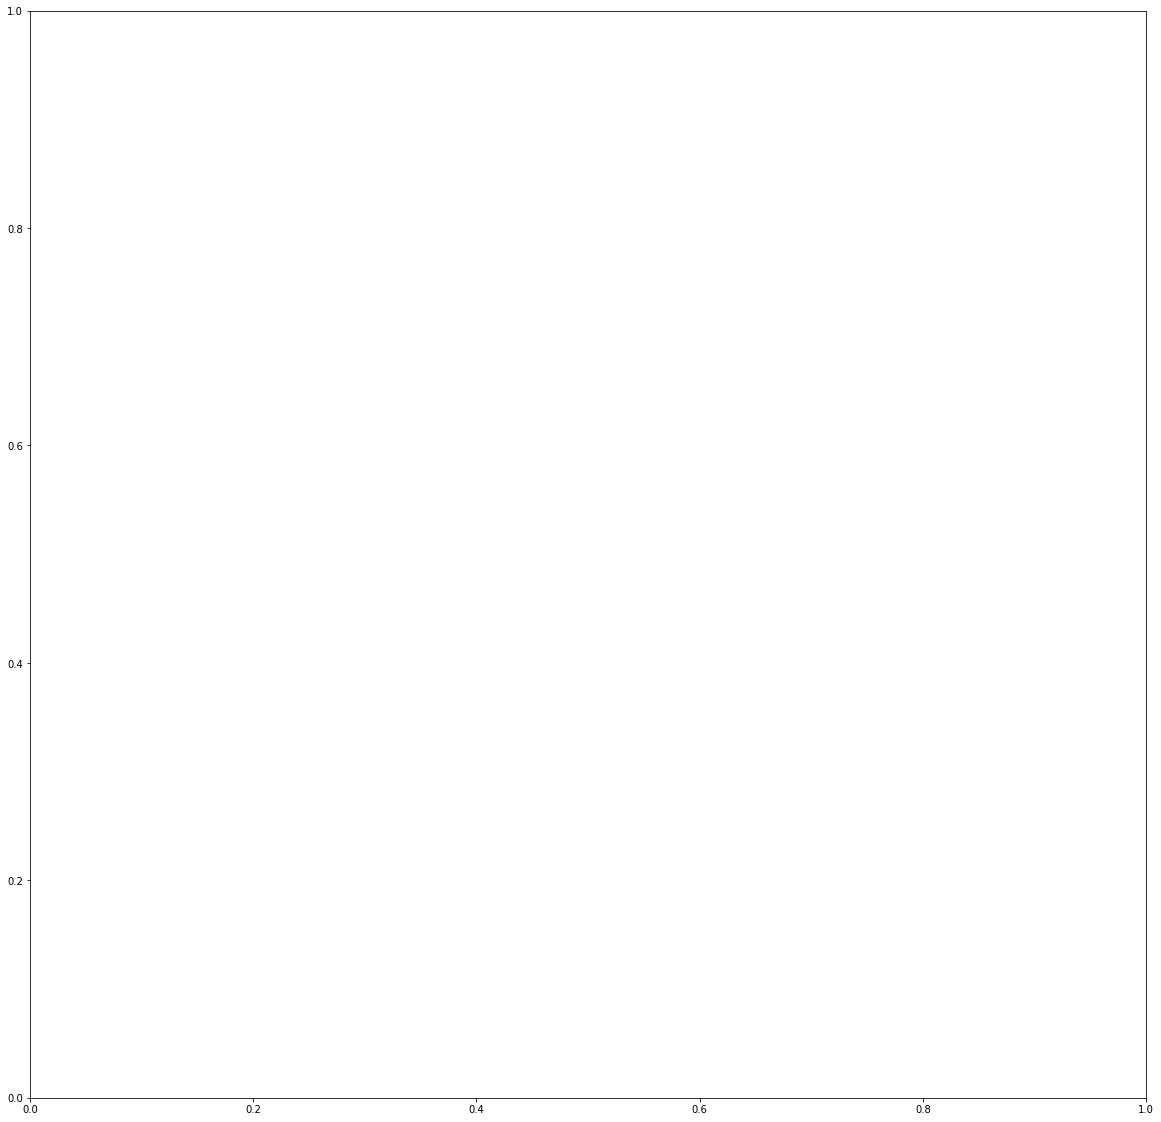

In [31]:
index = range(1, 5)
fig, ax = plt.subplots(figsize=(20, 20))
ax.boxplot(x,       vert=False,)
ax.set_title("Permutation Importances Random Forest (test set)", fontsize=15)

fig.tight_layout(pad=1.08, h_pad=5, w_pad=5, rect=None)
plt.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)
#plt.savefig('imagens/featuresImportances.png', format='png')

plt.show()


In [32]:

colunas = ['NU_NOTA_MT', 'NU_NOTA_MT_Random Forest',
       'NU_NOTA_MT_Regressão Linear', 'NU_NOTA_MT_Rede Neural',
       'NU_NOTA_MT_Árvore de decisão']
df_resposta['NU_NOTA_MT_Rede Neural']

0        596.7
1        470.8
2        467.5
3        457.5
4        498.5
         ...  
19377    517.0
19378    454.1
19379    489.8
19380    595.3
19381    483.9
Name: NU_NOTA_MT_Rede Neural, Length: 19382, dtype: float64

Text(0.5, 1.0, 'Distribíção das notas de matemática de acordo com cada modelo preditivo')

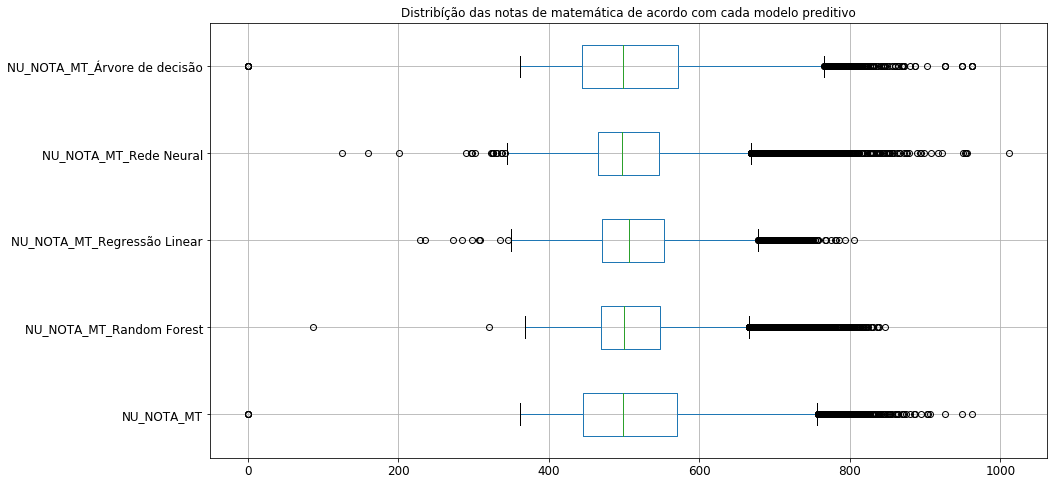

In [221]:
boxplot = df_resposta.boxplot(column=colunas, figsize=(15,8), fontsize=12, vert=False)
boxplot
boxplot.set_title('Distribíção das notas de matemática de acordo com cada modelo preditivo')


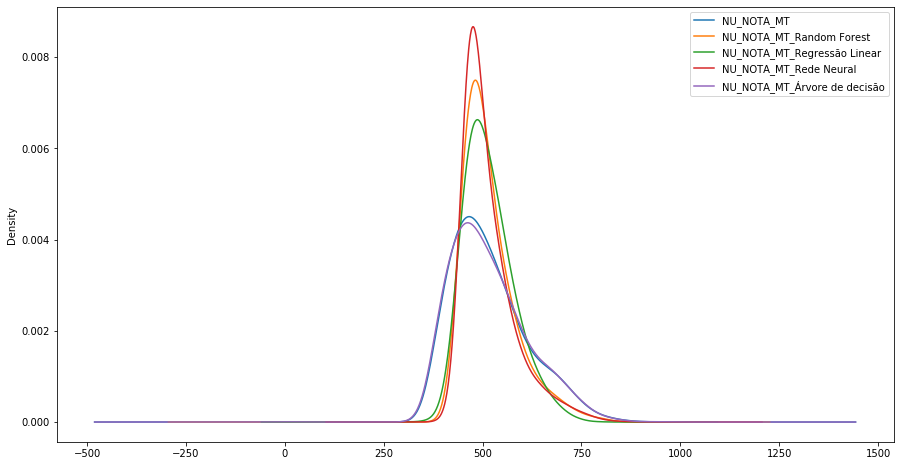

In [33]:
df = df_resposta[colunas]
df.plot.kde(bw_method=0.3, figsize=(15,8))

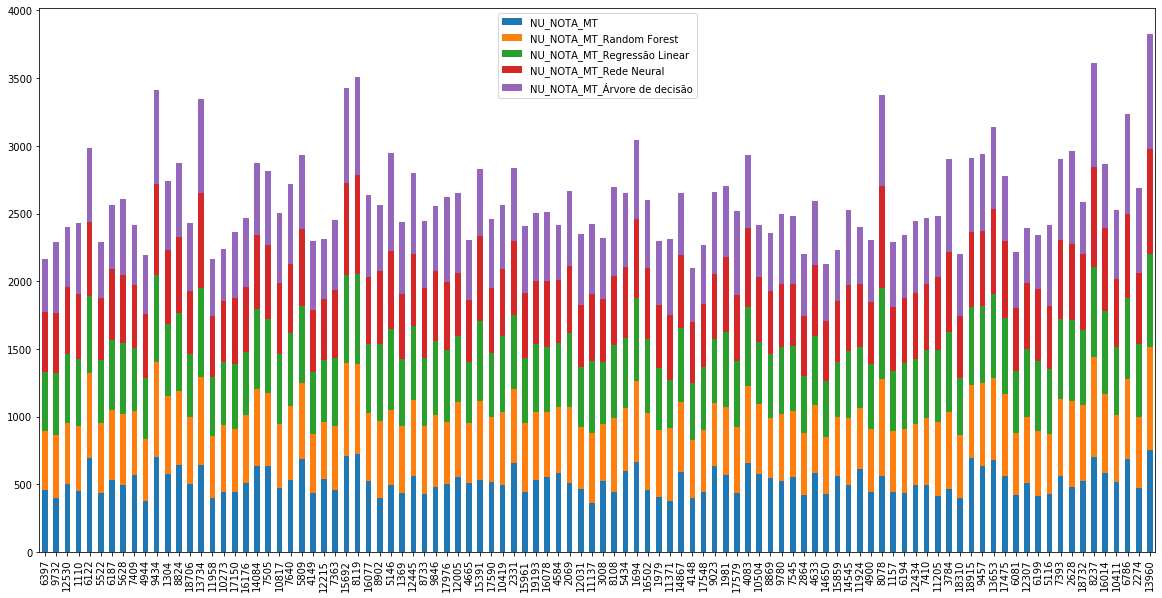

In [38]:
df.sample(100).plot.bar(stacked=True, figsize=(20,10));

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

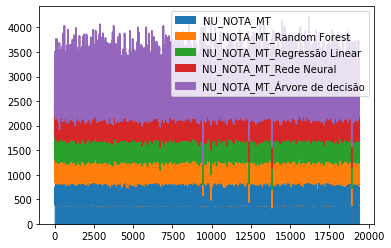

In [78]:
xticks = np.arange(0, 20000, 1000)
axs = df.plot.area()

plt.plot

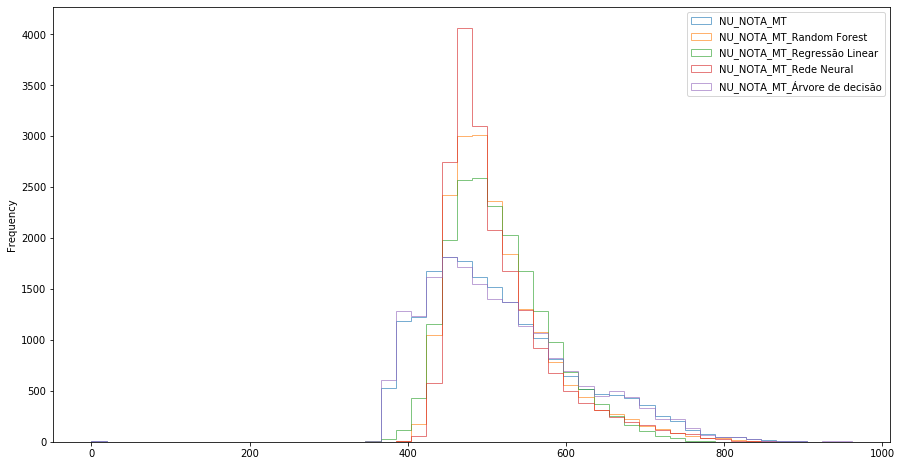

In [66]:
ax = df.plot.hist(bins=50, alpha=0.6, figsize=(15,8), histtype='step')

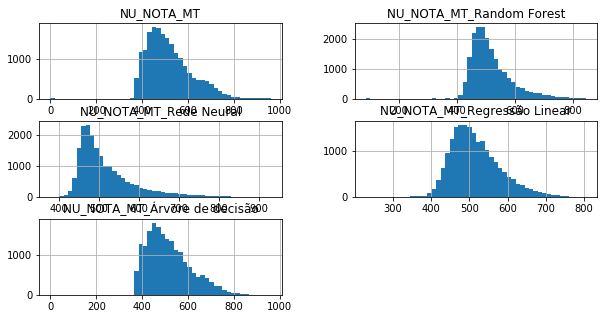

In [64]:
hist = df.hist(bins=50, figsize = (10,5))

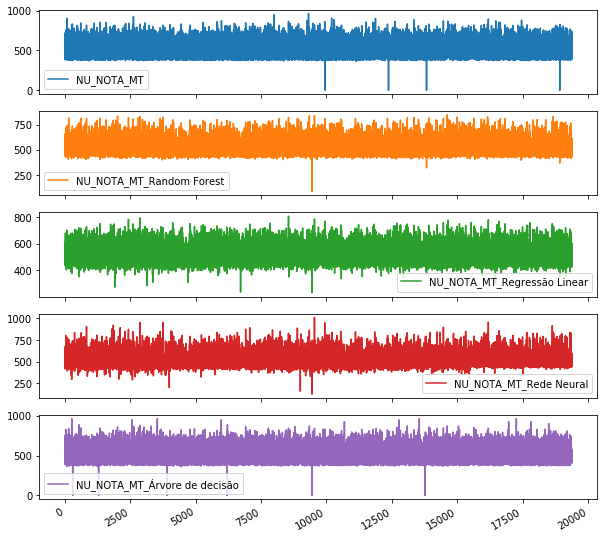

In [255]:
axes = df.plot.line(subplots = True, figsize = (10,10))

In [179]:
size = 100
data = df_resposta.sample(size).sort_values(by='NU_NOTA_MT')
data = data[colunas]
x = np.arange(0, size)
data.set_index([x])


,NU_NOTA_MT,NU_NOTA_MT_Random Forest,NU_NOTA_MT_Regressão Linear,NU_NOTA_MT_Rede Neural,NU_NOTA_MT_Árvore de decisão
0,384.7,495.20,489.627596,447.055760,475.7
1,385.1,521.88,507.622705,497.632849,434.8
2,394.5,440.34,435.837995,472.652098,509.4
3,399.0,532.09,568.794502,533.900942,468.3
4,399.3,517.59,489.714827,499.921053,452.5
...,...,...,...,...,...
95,717.9,602.22,654.939624,694.488135,536.0
96,728.7,633.01,604.113440,579.103082,525.0
97,745.0,719.71,650.593335,731.097465,710.2
98,763.7,665.99,688.035676,670.226649,500.8


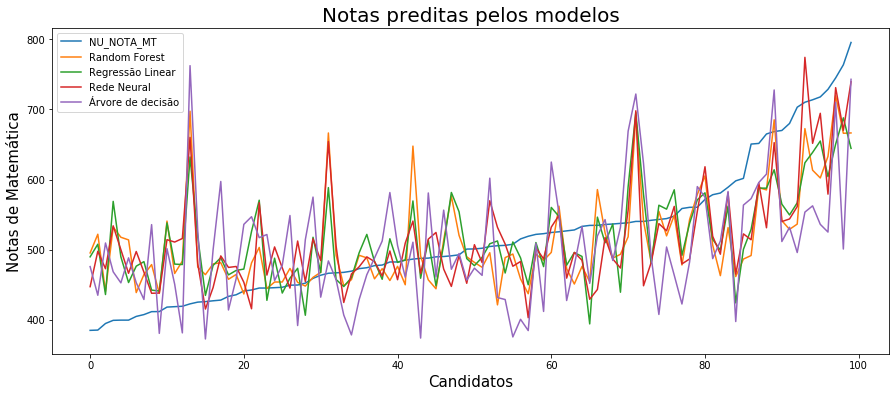

In [212]:

labels = ['NU_NOTA_MT','Random Forest', 'Regressão Linear', 'Rede Neural', 'Árvore de decisão']
colunas = ['NU_NOTA_MT', 'NU_NOTA_MT_Random Forest',
       'NU_NOTA_MT_Regressão Linear', 'NU_NOTA_MT_Rede Neural',
       'NU_NOTA_MT_Árvore de decisão']

x = np.arange(0, size)

fig, ax = plt.subplots(figsize=(15, 6))

for label, coluna in zip(labels, colunas):
    ax.plot(x, data[coluna], label = label)

plt.title("Notas preditas pelos modelos", fontsize=20)
plt.xlabel('Candidatos',fontsize=15 )
plt.ylabel('Notas de Matemática', fontsize=15)

plt.legend()
plt.show()

In [19]:
x = np.arange(0, len(df_resposta['NU_INSCRICAO']), 1000)
x

array([    0,  1000,  2000,  3000,  4000,  5000,  6000,  7000,  8000,
        9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000,
       18000, 19000])

In [39]:
df_resposta.loc[10:, 'NU_NOTA_MT']

10       506.7
11       470.5
12       443.3
13       685.3
14       392.2
         ...  
19377    495.7
19378    459.4
19379    530.8
19380    456.2
19381    435.9
Name: NU_NOTA_MT, Length: 19372, dtype: float64